# Week 8 extra is on Cross Validation and Model Selection. 

# Example A: Ensemble Classifier 
Example from Sklearn Documentation on Ensemble Classifier (VotingClassifier) #which compares standalone classifiers:

Decision Tree, Knn, SVC (you can expand to include further classifiers). The example also shows class boundary per each different classifier.

Note that there's no cross validation here — evaluation is done on the whole dataset (this is just to show the VotingClassifier)

# Plot the decision surface of a decision tree on the iris dataset
Plot the decision surface of a decision tree trained on pairs of features of the iris dataset.

See decision tree for more information on the estimator.

For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

We also show the tree structure of a model built on all of the features.

In [2]:

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


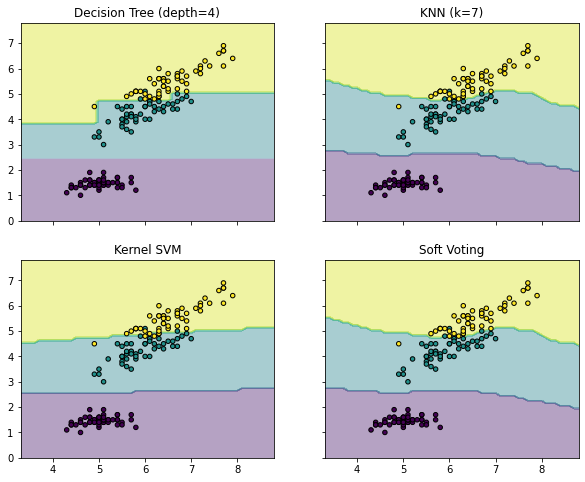

In [3]:

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers - say, your candidates
# Note that you now are including the VotingClassifier which takes the three candidates as input, and corresponding voting weights (equal weights if not specified).
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='hard', weights=[2, 5, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# Summary
In this tutorial, you discovered how to plot a decision surface for a classification machine learning algorithm.

Specifically, you learned:

Decision surface is a diagnostic tool for understanding how a classification algorithm divides up the feature space.
How to plot a decision surface for using crisp class labels for a machine learning algorithm.
How to plot and interpret a decision surface using predicted probabilities.

# Tasks A


- Include Random Forest Classifier in your pool of classifiers, draw classifcantion boundary for each.


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] 
y=data['species']  # Labels

# Split dataset into training set and test set And  70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 


In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [10]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()



- Soft voting is applied — with weights being 2, 1 and 2 for the three classifiers. Change weights and observe decision boundary (for instance, if you add more weight to Knn, you should see decision boundary move similar to Knn decision boundary).

- Soft voting is applied — apply hard voting instead (voting='hard') and observe decision boundary change.

### Hard voting and soft voting
1.1 concept introduction
Hard voting: just take the final result as a matter of fact. As follows, when a group of data passes through each predictor, the results are 1, 1, 2 and 1 respectively, then the final prediction result is 1 (the minority obeys the majority)

Soft voting: weighted average considering the probability values in each classifier. The final look is the probability value

1.2 hard voting display

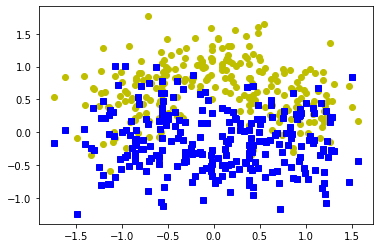

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

#For integrated learning, you can increase the data volume here, such as selecting 500 data volumes and setting some noise
X,y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Then select the data labeled 0 and 1 respectively for drawing display
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo')
plt.plot(X[:,0][y==0],X[:,1][y==1],'bs')

 1.3 comparison between hard voting and soft voting
Voting strategy: soft voting and hard voting

Hard voting: the category value is used directly, and the minority is subordinate to the majority
Soft voting: weighted average the probability values of each classifier
Hard voting:
Get the above reference code

In [2]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Create instances of multiple classifiers
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
#Support vector machine will be updated in the blog later. 

#Constructing voting classifier
voting_clf = VotingClassifier(estimators = [('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting = 'hard')

#The training model can only look at the results of the voting classifier
#voting_clf.fit(X_train,y_train)

#the results of all classifiers, traverse the loop, and then output the results
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.896


Soft voting

Next is the code implementation of soft voting. What needs to be changed is voting = 'soft'. In addition, since soft voting is for probability value, the parameter probability in SVC classifier is False by default, so it needs to be set to True

In [3]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Create instances of multiple classifiers,
log_clf = LogisticRegression(random_state = 42)
rnd_clf = RandomForestClassifier(random_state = 42)
svm_clf = SVC(probability=True,random_state = 42) 
#Build a voting classifier and pass in three classifiers
voting_clf = VotingClassifier(estimators = [('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting = 'soft')
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92
